<img style="float: right; margin: 0px 0px 15px 15px;" src="https://occ-mkt.s3.us-west-2.amazonaws.com/blog/wp-content/uploads/2020/09/Empresas-que-ofrecen-seguro-de-vida.jpg" width="350px" height="180px" />

# <font color= #1E9OFF> Análisis Estadístico Multivariado </font>

- <Strong> `Claudia Celeste Castillejos Jáuregui` </Strong>
- <Strong> `30 marzo 2022`</Strong>
- <Strong> `Ejercicio 1`</Strong>
- <Strong> `claudia.castillejos@iteso.mx` </Strong> 
- <Strong> `Rocio Carrasco Navarro` </Strong> 


### <font color= #1E9OFF> Apéndice </font>

- Portada.
- Introducción.
- Descripción de la base de datos.
- Objetivo.
- Desarrollo.
- Resultados
- Conclusiones.

### <font color= #1E9OFF> Introducción </font>

En está practica hablaremos de una base de datos acerca de seguros de vida, lo más importante será determinar si hay diferencias en las medias de las variables que se prueben a continuación y si es así determinar cuáles son las medias distintas con respecto a la base de datos.

### <font color= #1E9OFF> Descripción de la base de datos </font>

Esta base de datos tiene 7 variables, 3 categóricas y 4 númericas.La variable dependiente es cargos, que se refiere al costo del seguro médico individual.

Nombre de las variables:

* edad (age): edad del beneficiario principal

* sexo (sex): contratista de seguros género, femenino, masculino

* bmi (bmi): Índice de masa corporal, que proporciona una comprensión del cuerpo, pesos que son relativamente altos o bajos en relación con la altura,
índice objetivo de peso corporal (kg / m ^ 2) utilizando la relación entre altura y peso, idealmente 18,5 a 24,9

* niños (children): Número de niños cubiertos por el seguro de salud / Número de dependientes

* fumador (smoker): si fuman

* región (region): el área residencial del beneficiario en los EE. UU., noreste, sureste, suroeste, noroeste.

* cargos (charges): costos médicos individuales facturados por el seguro de salud


### <font color= #1E9OFF> Objectivo </font>

Realizar un ánalisis de las diferencias entre las medias de una base de datos  con ayuda del ANOVA y interpretar los resutados.

### <font color= #1E9OFF> Desarrollo </font>

In [18]:
import pandas as pd 
import numpy as np
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
import pingouin as pg

#### <font color= #1E9OFF> 1.- Elegir una base de datos apropiada para el análisis de la varianza. </font> 

In [19]:
# Cargamos la base de datos
data = pd.read_csv("insurance.csv", sep=',')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [20]:
# El tipo de dato de las variables 
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [22]:
#Checamos si hay datos nulos
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [21]:
# Lista de las variables
data.columns.values

array(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'],
      dtype=object)


#### <font color= #1E9OFF> 2. Diseñar un modelo de ANOVA de un factor con 3 o más niveles. </font> 

<AxesSubplot:title={'center':'charges'}, xlabel='region'>

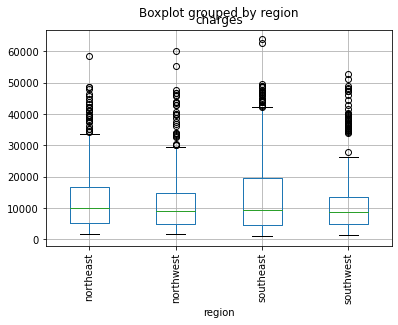

In [23]:
groups= data.groupby('region').count().reset_index()
rp.summary_cont(data['charges'].groupby(data['region']))
data.boxplot('charges',by='region',rot=90)

En el diagrama de cajas y bigotes podemos ver que hay muchos datos atípicos por nivel de región.

In [24]:
#Anova
model= ols('charges ~ region', data=data).fit()
anova_table =sm.stats.anova_lm(model,type=2)
print (anova_table)

              df        sum_sq       mean_sq         F    PR(>F)
region       3.0  1.300760e+09  4.335866e+08  2.969627  0.030893
Residual  1334.0  1.947735e+11  1.460071e+08       NaN       NaN


En esta tabla el p-value es menor que 0.05 por lo tanto no se acepta la hipótesis nula y hay diferencia entre sus medias.

In [25]:
#Supuestos del modelo 
#Normalidad prueba de Shapiro-Wilk
#Ho: Normalidad(p>0.05)
#H1: No Normalidad(p<0.05)
#Normalidad en las variables
pg.normality(data, dv='charges',group='region')

,W,pval,normal
southwest,0.784295,2.023704e-20,False
southeast,0.824230,1.232663e-19,False
northwest,0.812803,4.268424e-19,False
northeast,0.835343,6.552676e-18,False


Los niveles de esta base de datos no tienen normalidad por que están sesgados los datos.

In [30]:
#Homocedasticidad prueba de Levene (sin normalidad)
#Ho: Homocedasticidad(p>0.05)
#H1: No Homocedasticidad(p<0.05)
pg.homoscedasticity(data, dv='charges',group='region',method='levene')

,W,pval,equal_var
levene,5.559967,0.000861,False


Es homocedastico, por lo tanto tiene una varianza constante.

In [27]:
#Comparación multiple Prueba de Tukey
comp =mc.MultiComparison(data['charges'],data['region'])
post_hoc_res = comp.tukeyhsd()
print(post_hoc_res.summary())

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1    group2   meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------------
northeast northwest  -988.8091 0.7245 -3428.9343 1451.3161  False
northeast southeast  1329.0269 0.4745 -1044.9417 3702.9955  False
northeast southwest -1059.4471 0.6792 -3499.5723 1380.6781  False
northwest southeast  2317.8361 0.0583   -54.1994 4689.8716  False
northwest southwest    -70.638 0.9999 -2508.8826 2367.6066  False
southeast southwest -2388.4741 0.0477 -4760.5096  -16.4386   True
-----------------------------------------------------------------


### <font color= #1E9OFF> Resultados: </font> 
En la prueba de Tukey, con la comparación de southweast y southwest determinamos que hay una diferencia entre ambas regiones con respecto a cuanto deben de pagar por el seguro. La comparación entre northwest y southwest da un meandiff negativo, por que el promedio de el grupo 2 es mayor. solo la comparación de northeast y southeast da positivo en el meandiff eso quiere decir que el mayor promedio está en el grupo 1.

#### <font color= #1E9OFF> 3.- Diseñar un modelo de ANOVA de 2 o más factores. </font> 

In [28]:
model= ols('charges ~ region + smoker + sex', data=data).fit()
anova_table =sm.stats.anova_lm(model,type=2)
print (anova_table)

              df        sum_sq       mean_sq            F         PR(>F)
region       3.0  1.300760e+09  4.335866e+08     7.757896   3.883674e-05
smoker       1.0  1.203267e+11  1.203267e+11  2152.930530  1.830264e-280
sex          1.0  1.698505e+06  1.698505e+06     0.030390   8.616341e-01
Residual  1332.0  7.444510e+10  5.588971e+07          NaN            NaN


### <font color= #1E9OFF> Resultados: </font> 

El p-value para la variable smoker es menor que 0.05 por lo tanto no se acepta la hipótesis nula y hay diferencia entre sus medias. Para la variable sex es mayor a 0.05 por lo tanto se acepta la hipótesis nula y no hay diferencia entre las medias que significa que el precio del seguro es casi igual para hombres como a mujeres. Por último, región que es menor que 0.05 por lo tanto no se acepta la hipótesis nula y hay diferencia entre sus medias.

In [31]:
#Comparación multiple Prueba de Tukey
comp =mc.MultiComparison(data['charges'],data['region'])
post_hoc_res = comp.tukeyhsd()
print(post_hoc_res.summary())

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1    group2   meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------------
northeast northwest  -988.8091 0.7245 -3428.9343 1451.3161  False
northeast southeast  1329.0269 0.4745 -1044.9417 3702.9955  False
northeast southwest -1059.4471 0.6792 -3499.5723 1380.6781  False
northwest southeast  2317.8361 0.0583   -54.1994 4689.8716  False
northwest southwest    -70.638 0.9999 -2508.8826 2367.6066  False
southeast southwest -2388.4741 0.0477 -4760.5096  -16.4386   True
-----------------------------------------------------------------


Como vimos en los resultados de el modelo de ANOVA de un factor si hay una distribución que son diferentes sus medias y es la de southeast y soutwest

In [35]:
#Comparación multiple Prueba de Tukey
comp =mc.MultiComparison(data['charges'],data['smoker'])
post_hoc_res = comp.tukeyhsd()
print(post_hoc_res.summary())

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
    no    yes 23615.9635  -0.0 22623.1748 24608.7523   True
-----------------------------------------------------------


Para esta tabla de Tukey podemos ver que hay una diferencia en las medias de si es o no fumador para determinar cuanto les costará el seguro de vida. 

In [36]:
#Comparación multiple Prueba de Tukey
comp =mc.MultiComparison(data['charges'],data['sex'])
post_hoc_res = comp.tukeyhsd()
print(post_hoc_res.summary())

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2  meandiff p-adj   lower    upper   reject
-------------------------------------------------------
female   male 1387.1723 0.0361 89.8123 2684.5324   True
-------------------------------------------------------


Para esta tabla de Tukey podemos ver que hay una diferencia en las medias de hombres y mujeres para determinar cuanto les costará el seguro de vida. 

### <font color= #1E9OFF> Conclusiones: </font> 

Considero que esta práctica me ayudo a entender mejor los conceptos que vimos en clase. además de saber cómo se emplea la distribución de las medias en un caso de la vida real. La parte más difícil de la practica fue encontrar una base de datos que sea adecuara a los requerimientos del trabajo. Lo más facil fue implementar el código del ANOVA para una variable.